In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

import plotly.graph_objects as go

In [2]:
# importing dataset

dataset = pd.read_csv('feeds_SACP1_old_2021-09-09.csv')
dataset_final = dataset[['Ambient Temp (degC)','Humidity (%)', 'Soil Moisture (%)', 'Capacitor Voltage (mV)', 'Soil Temperature (degC)', 'SACP Cell Current (mA)', 'Soil Voltage (V)', 'Cell Power (mW)']]

# seperating dataset based on time day month and year
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
dataset['year'] = dataset['created_at'].dt.year
dataset['month'] = dataset['created_at'].dt.month
dataset['day'] = dataset['created_at'].dt.day

dataset = dataset.drop(dataset[dataset['SACP Cell Current (mA)'] > 100].index)
dataset = dataset.drop(dataset[dataset['Soil Voltage (V)'] > 3].index)
dataset = dataset.drop(dataset[dataset['Cell Power (mW)'] > 100].index)
dataset

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,created_at,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day
0,2020-06-18 23:29:49,1,20.6875,47.49635,99,2907.74194,22.5000,25.9,0.2946,8,2020,6,18
1,2020-06-18 23:30:58,2,20.6250,47.52944,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18
2,2020-06-18 23:32:06,3,20.6250,47.55913,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18
3,2020-06-18 23:33:15,4,20.5625,47.59531,99,2912.90332,22.5000,26.0,0.2946,8,2020,6,18
4,2020-06-18 23:34:23,5,20.4375,47.60892,99,2911.61279,22.4375,26.0,0.2946,8,2020,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380356,2021-07-26 19:11:20,380357,26.1250,88.10663,100,2925.48389,24.9375,16.4,1.6400,0,2021,7,26
380357,2021-07-26 19:12:30,380358,26.0625,88.35374,100,2874.19360,24.9375,16.4,1.6400,0,2021,7,26
380358,2021-07-26 19:13:40,380359,26.0625,88.63950,100,2889.67749,24.9375,16.4,1.6400,0,2021,7,26
380359,2021-07-26 19:14:49,380360,25.9375,88.89094,100,3067.41943,24.8750,16.3,1.6300,0,2021,7,26


<AxesSubplot:>

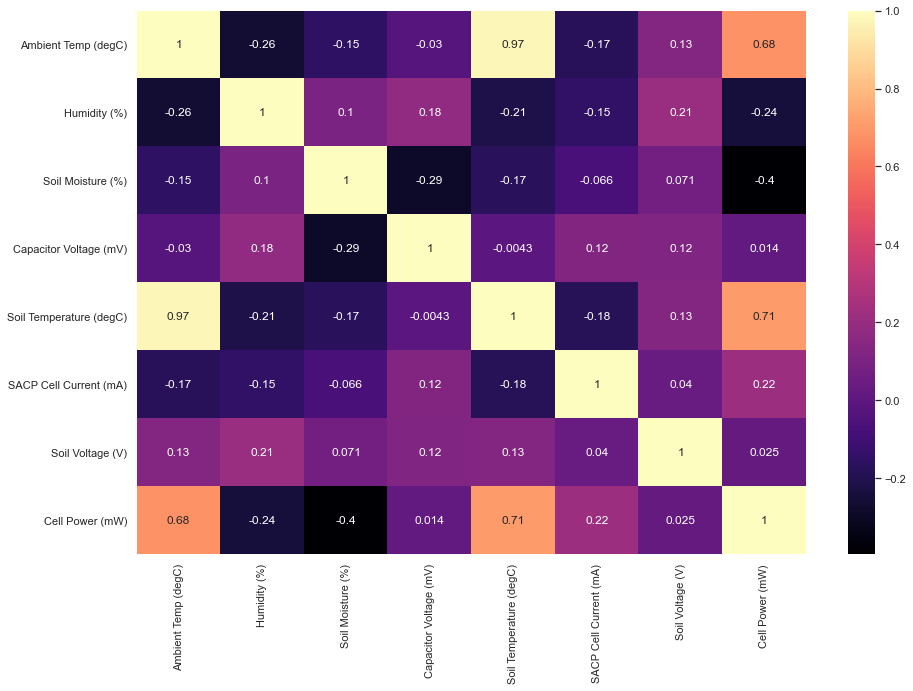

In [3]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data = dataset_final.corr()
sns.heatmap(correlation_data, cmap='magma', annot= True, cbar= True)

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'Distribution of Cell Power (mW)'}, xlabel='Cell Power (mW)', ylabel='Density'>

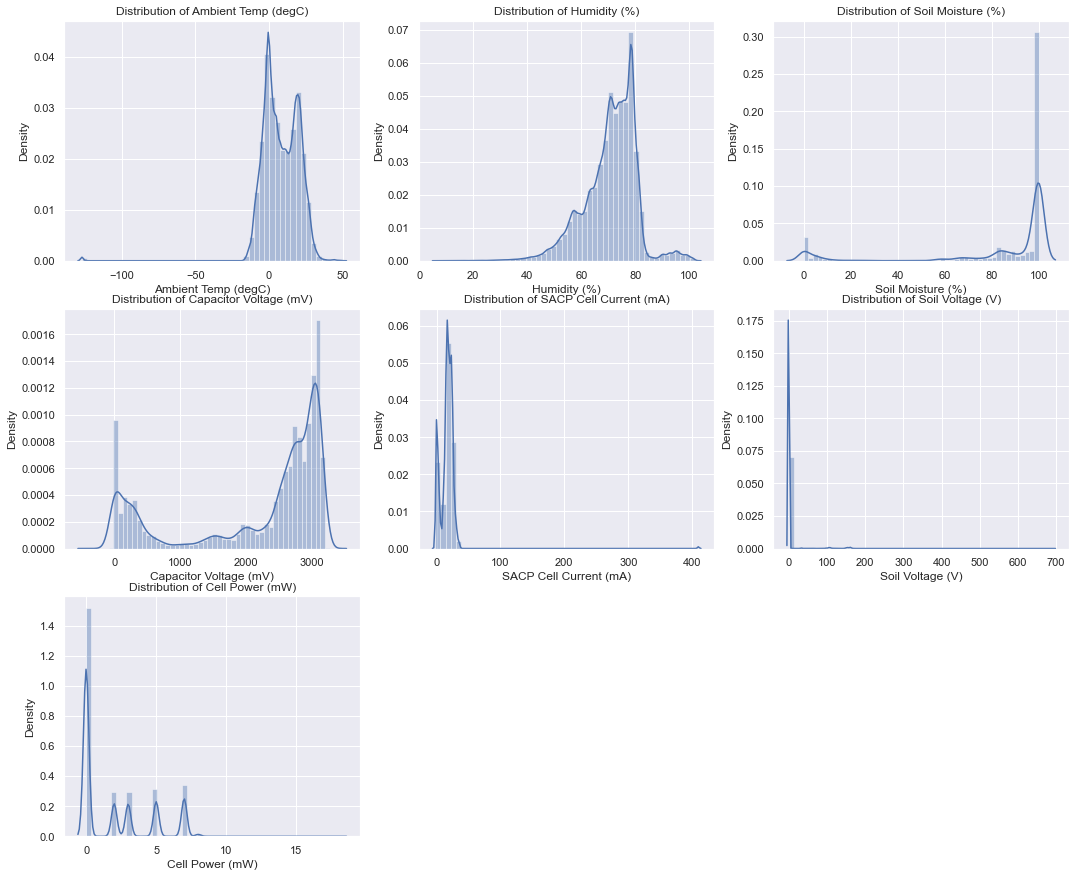

In [4]:
fig = plt.figure(figsize=(18,15))

plt.subplot(331)
plt.title("Distribution of Ambient Temp (degC)")
sns.distplot(dataset_final['Ambient Temp (degC)'], hist = True, kde = True)

plt.subplot(332)
plt.title("Distribution of Humidity (%)")
sns.distplot(dataset_final['Humidity (%)'], hist = True, kde = True)

plt.subplot(333)
plt.title("Distribution of Soil Moisture (%)")
sns.distplot(dataset_final['Soil Moisture (%)'], hist = True, kde = True)

plt.subplot(334)
plt.title("Distribution of Capacitor Voltage (mV)")
sns.distplot(dataset_final['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(335)
plt.title("Distribution of SACP Cell Current (mA)")
sns.distplot(dataset_final['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(336)
plt.title("Distribution of Soil Voltage (V)")
sns.distplot(dataset_final['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(337)
plt.title("Distribution of Cell Power (mW)")
sns.distplot(dataset_final['Cell Power (mW)'], hist = True, kde = True)

In [5]:
dataset_2020 = dataset.loc[(dataset['month'] <= 12) & (dataset['year'] == 2020)]
dataset_2021 = dataset.loc[(dataset['month'] <= 12) & (dataset['year'] == 2021)]
dataset_june_2020 = dataset.loc[(dataset['month'] == 6) & (dataset['year'] == 2020)]
dataset_july_2020 = dataset.loc[(dataset['month'] == 7) & (dataset['year'] == 2020)]
dataset_aug_2020 = dataset.loc[(dataset['month'] == 8) & (dataset['year'] == 2020)]
dataset_sept_2020 = dataset.loc[(dataset['month'] == 9) & (dataset['year'] == 2020)]
dataset_oct_2020 = dataset.loc[(dataset['month'] == 10) & (dataset['year'] == 2020)]
dataset_nov_2020 = dataset.loc[(dataset['month'] == 11) & (dataset['year'] == 2020)]
dataset_dec_2020 = dataset.loc[(dataset['month'] == 12) & (dataset['year'] == 2020)]

dataset_jan_2021 = dataset.loc[(dataset['month'] == 1) & (dataset['year'] == 2021)]
dataset_feb_2021 = dataset.loc[(dataset['month'] == 2) & (dataset['year'] == 2021)]
dataset_mar_2021 = dataset.loc[(dataset['month'] == 3) & (dataset['year'] == 2021)]
dataset_apr_2021 = dataset.loc[(dataset['month'] == 4) & (dataset['year'] == 2021)]
dataset_may_2021 = dataset.loc[(dataset['month'] == 5) & (dataset['year'] == 2021)]
dataset_june_2021 = dataset.loc[(dataset['month'] == 6) & (dataset['year'] == 2021)]
dataset_july_2021 = dataset.loc[(dataset['month'] == 7) & (dataset['year'] == 2021)]
dataset_aug_2021 = dataset.loc[(dataset['month'] == 8) & (dataset['year'] == 2021)]

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'Distribution of Cell Power (mW)'}, xlabel='Cell Power (mW)', ylabel='Density'>

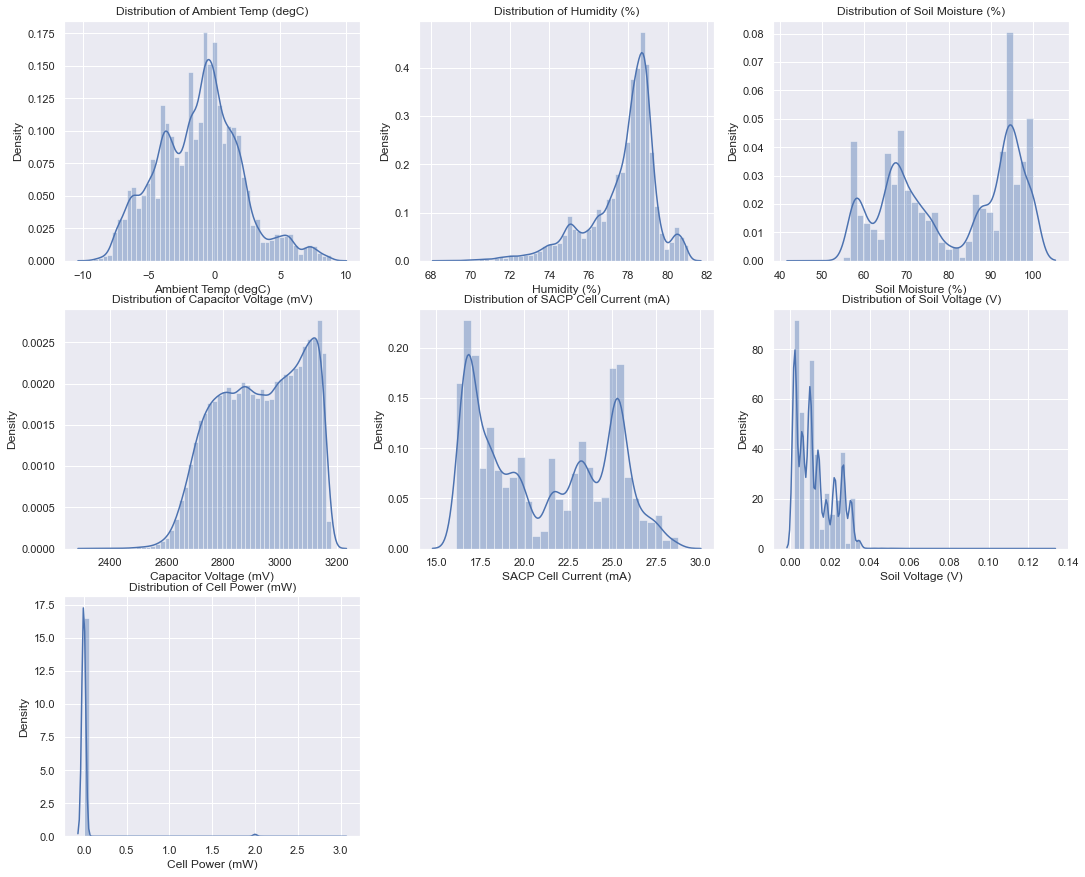

In [6]:
fig = plt.figure(figsize=(18,15))

plt.subplot(331)
plt.title("Distribution of Ambient Temp (degC)")
sns.distplot(dataset_dec_2020['Ambient Temp (degC)'], hist = True, kde = True)

plt.subplot(332)
plt.title("Distribution of Humidity (%)")
sns.distplot(dataset_dec_2020['Humidity (%)'], hist = True, kde = True)

plt.subplot(333)
plt.title("Distribution of Soil Moisture (%)")
sns.distplot(dataset_dec_2020['Soil Moisture (%)'], hist = True, kde = True)

plt.subplot(334)
plt.title("Distribution of Capacitor Voltage (mV)")
sns.distplot(dataset_dec_2020['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(335)
plt.title("Distribution of SACP Cell Current (mA)")
sns.distplot(dataset_dec_2020['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(336)
plt.title("Distribution of Soil Voltage (V)")
sns.distplot(dataset_dec_2020['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(337)
plt.title("Distribution of Cell Power (mW)")
sns.distplot(dataset_dec_2020['Cell Power (mW)'], hist = True, kde = True)

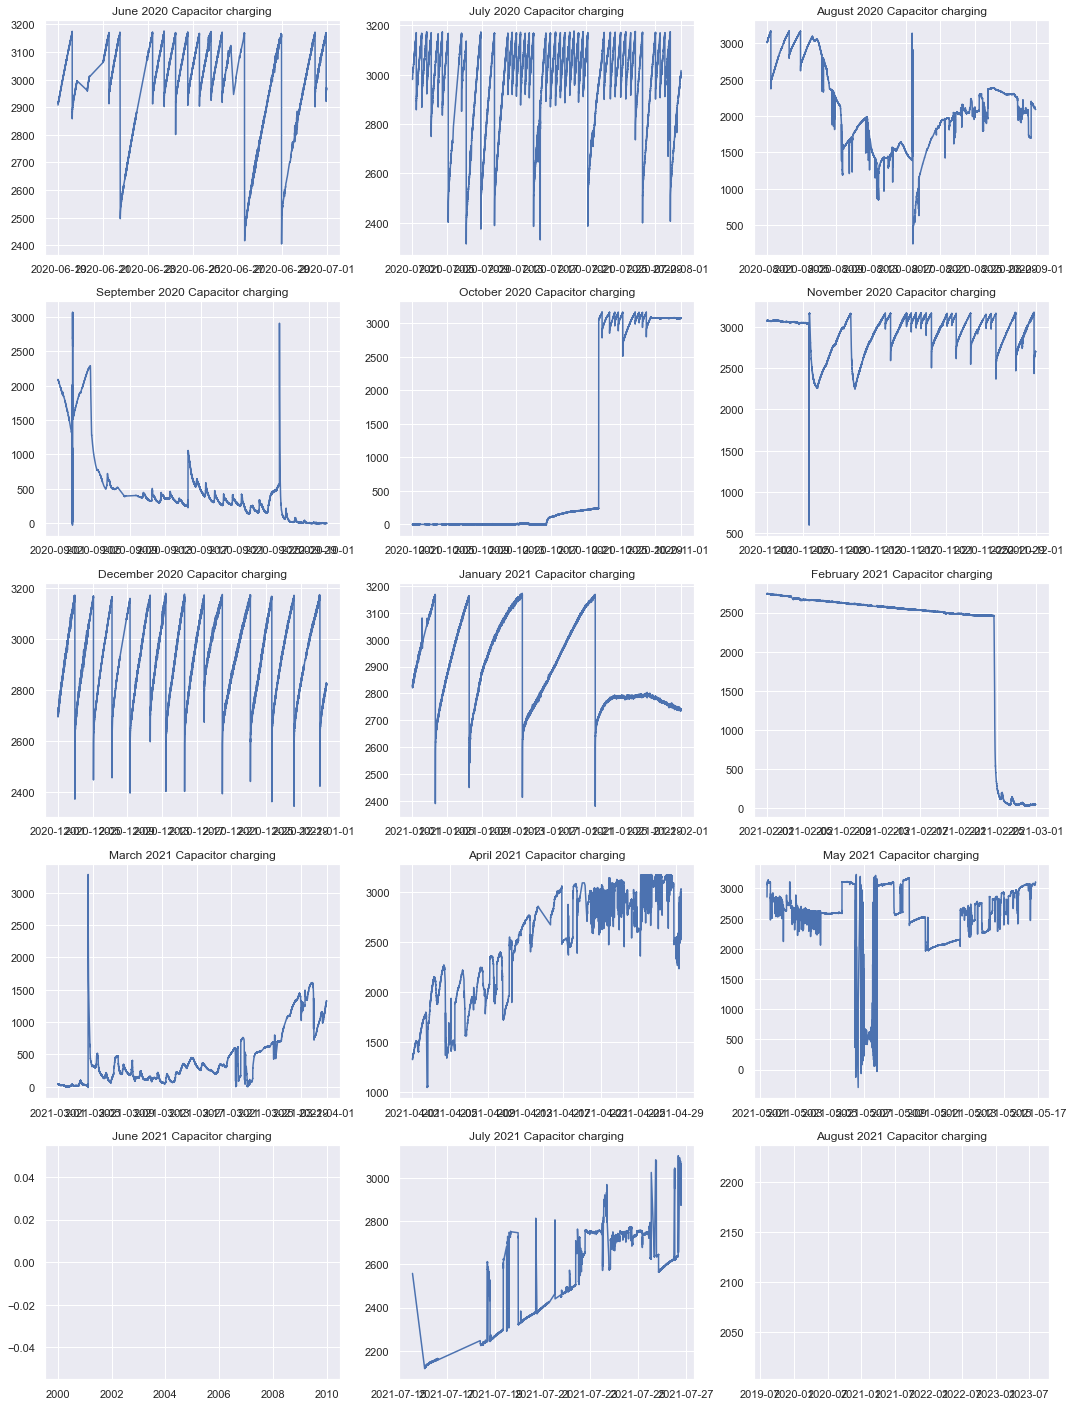

In [7]:
fig = plt.figure(figsize=(18,25))

plt.subplot(531)
plt.title("June 2020 Capacitor charging")
plt.plot(dataset_june_2020['created_at'], dataset_june_2020['Capacitor Voltage (mV)'])

plt.subplot(532)
plt.title("July 2020 Capacitor charging")
plt.plot(dataset_july_2020['created_at'], dataset_july_2020['Capacitor Voltage (mV)'])

plt.subplot(533)
plt.title("August 2020 Capacitor charging")
plt.plot(dataset_aug_2020['created_at'], dataset_aug_2020['Capacitor Voltage (mV)'])

plt.subplot(534)
plt.title("September 2020 Capacitor charging")
plt.plot(dataset_sept_2020['created_at'], dataset_sept_2020['Capacitor Voltage (mV)'])

plt.subplot(535)
plt.title("October 2020 Capacitor charging")
plt.plot(dataset_oct_2020['created_at'], dataset_oct_2020['Capacitor Voltage (mV)'])

plt.subplot(536)
plt.title("November 2020 Capacitor charging")
plt.plot(dataset_nov_2020['created_at'], dataset_nov_2020['Capacitor Voltage (mV)'])

plt.subplot(537)
plt.title("December 2020 Capacitor charging")
plt.plot(dataset_dec_2020['created_at'], dataset_dec_2020['Capacitor Voltage (mV)'])

plt.subplot(538)
plt.title("January 2021 Capacitor charging")
plt.plot(dataset_jan_2021['created_at'], dataset_jan_2021['Capacitor Voltage (mV)'])

plt.subplot(539)
plt.title("February 2021 Capacitor charging")
plt.plot(dataset_feb_2021['created_at'], dataset_feb_2021['Capacitor Voltage (mV)'])

plt.subplot(5,3,10)
plt.title("March 2021 Capacitor charging")
plt.plot(dataset_mar_2021['created_at'], dataset_mar_2021['Capacitor Voltage (mV)'])

plt.subplot(5,3,11)
plt.title("April 2021 Capacitor charging")
plt.plot(dataset_apr_2021['created_at'], dataset_apr_2021['Capacitor Voltage (mV)'])

plt.subplot(5,3,12)
plt.title("May 2021 Capacitor charging")
plt.plot(dataset_may_2021['created_at'], dataset_may_2021['Capacitor Voltage (mV)'])

plt.subplot(5,3,13)
plt.title("June 2021 Capacitor charging")
plt.plot(dataset_june_2021['created_at'], dataset_june_2021['Capacitor Voltage (mV)'])

plt.subplot(5,3,14)
plt.title("July 2021 Capacitor charging")
plt.plot(dataset_july_2021['created_at'], dataset_july_2021['Capacitor Voltage (mV)'])

plt.subplot(5,3,15)
plt.title("August 2021 Capacitor charging")
plt.plot(dataset_aug_2021['created_at'], dataset_aug_2021['Capacitor Voltage (mV)'])

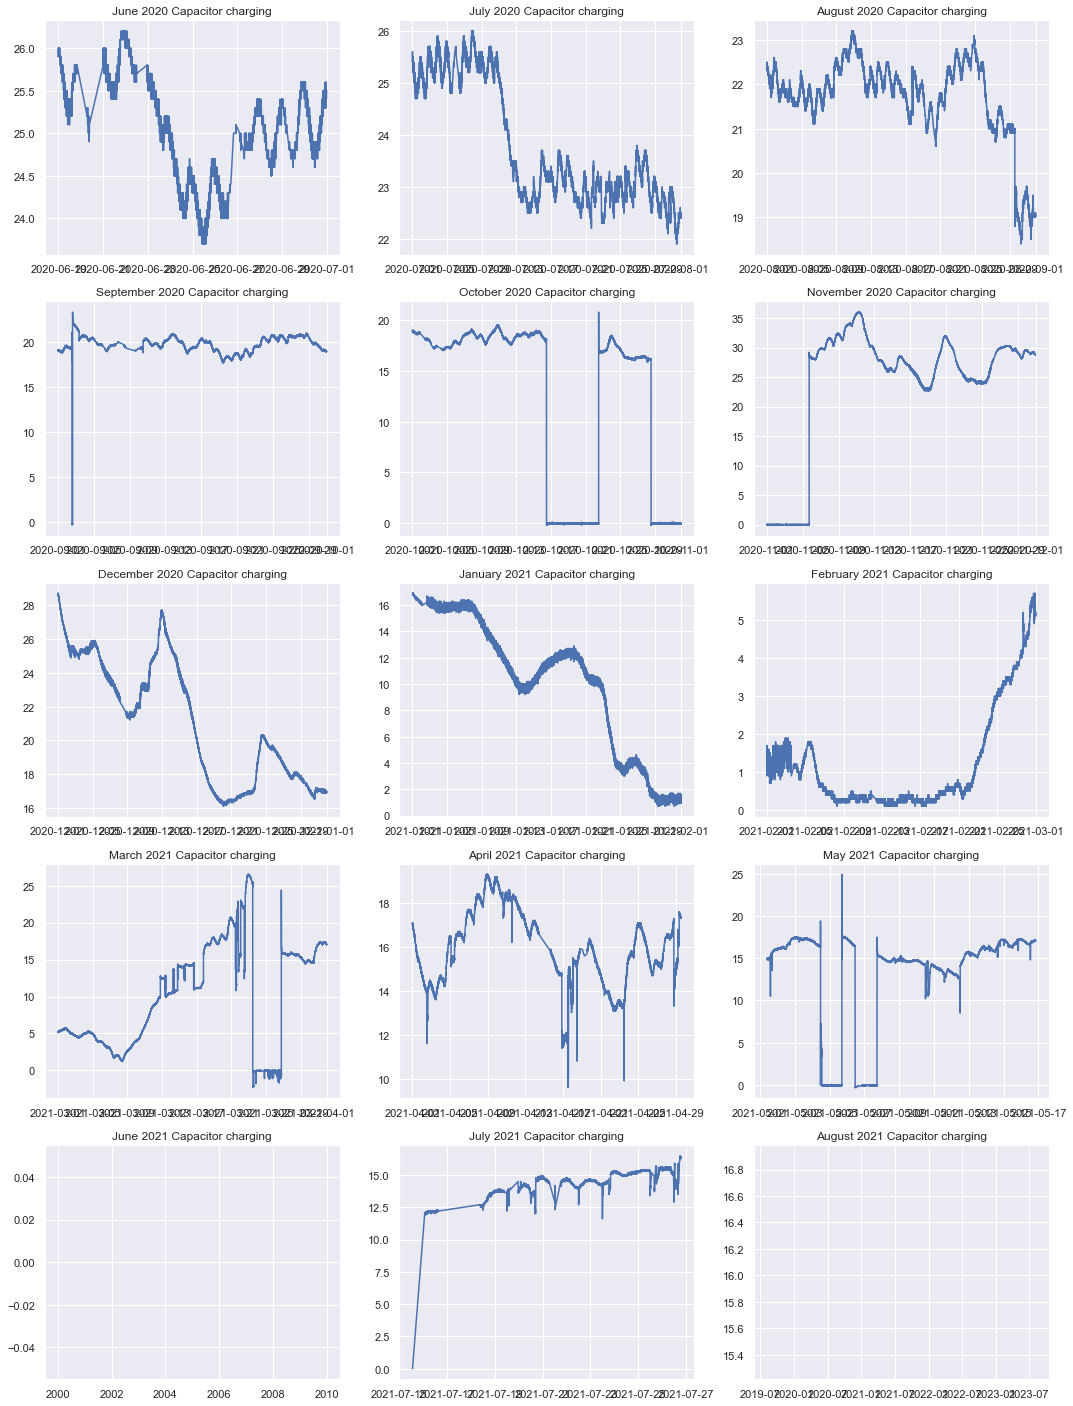

In [8]:
fig = plt.figure(figsize=(18,25))

plt.subplot(531)
plt.title("June 2020 Capacitor charging")
plt.plot(dataset_june_2020['created_at'], dataset_june_2020['SACP Cell Current (mA)'])

plt.subplot(532)
plt.title("July 2020 Capacitor charging")
plt.plot(dataset_july_2020['created_at'], dataset_july_2020['SACP Cell Current (mA)'])

plt.subplot(533)
plt.title("August 2020 Capacitor charging")
plt.plot(dataset_aug_2020['created_at'], dataset_aug_2020['SACP Cell Current (mA)'])

plt.subplot(534)
plt.title("September 2020 Capacitor charging")
plt.plot(dataset_sept_2020['created_at'], dataset_sept_2020['SACP Cell Current (mA)'])

plt.subplot(535)
plt.title("October 2020 Capacitor charging")
plt.plot(dataset_oct_2020['created_at'], dataset_oct_2020['SACP Cell Current (mA)'])

plt.subplot(536)
plt.title("November 2020 Capacitor charging")
plt.plot(dataset_nov_2020['created_at'], dataset_nov_2020['SACP Cell Current (mA)'])

plt.subplot(537)
plt.title("December 2020 Capacitor charging")
plt.plot(dataset_dec_2020['created_at'], dataset_dec_2020['SACP Cell Current (mA)'])

plt.subplot(538)
plt.title("January 2021 Capacitor charging")
plt.plot(dataset_jan_2021['created_at'], dataset_jan_2021['SACP Cell Current (mA)'])

plt.subplot(539)
plt.title("February 2021 Capacitor charging")
plt.plot(dataset_feb_2021['created_at'], dataset_feb_2021['SACP Cell Current (mA)'])

plt.subplot(5,3,10)
plt.title("March 2021 Capacitor charging")
plt.plot(dataset_mar_2021['created_at'], dataset_mar_2021['SACP Cell Current (mA)'])

plt.subplot(5,3,11)
plt.title("April 2021 Capacitor charging")
plt.plot(dataset_apr_2021['created_at'], dataset_apr_2021['SACP Cell Current (mA)'])

plt.subplot(5,3,12)
plt.title("May 2021 Capacitor charging")
plt.plot(dataset_may_2021['created_at'], dataset_may_2021['SACP Cell Current (mA)'])

plt.subplot(5,3,13)
plt.title("June 2021 Capacitor charging")
plt.plot(dataset_june_2021['created_at'], dataset_june_2021['SACP Cell Current (mA)'])

plt.subplot(5,3,14)
plt.title("July 2021 Capacitor charging")
plt.plot(dataset_july_2021['created_at'], dataset_july_2021['SACP Cell Current (mA)'])

plt.subplot(5,3,15)
plt.title("August 2021 Capacitor charging")
plt.plot(dataset_aug_2021['created_at'], dataset_aug_2021['SACP Cell Current (mA)'])

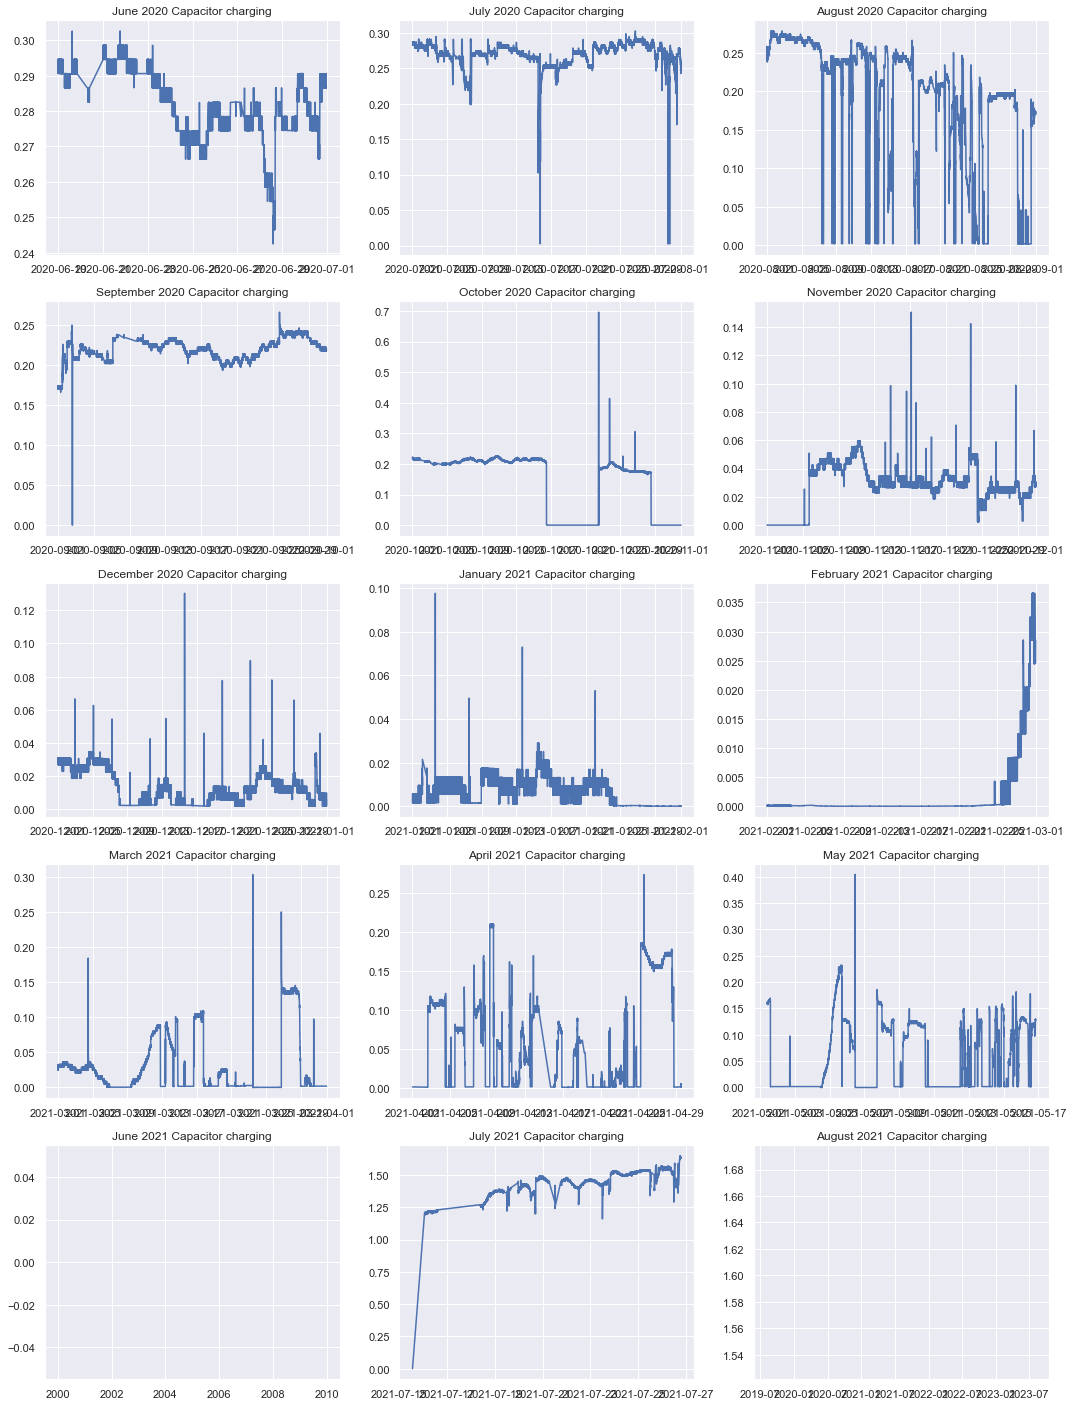

In [9]:
fig = plt.figure(figsize=(18,25))

plt.subplot(531)
plt.title("June 2020 Capacitor charging")
plt.plot(dataset_june_2020['created_at'], dataset_june_2020['Soil Voltage (V)'])

plt.subplot(532)
plt.title("July 2020 Capacitor charging")
plt.plot(dataset_july_2020['created_at'], dataset_july_2020['Soil Voltage (V)'])

plt.subplot(533)
plt.title("August 2020 Capacitor charging")
plt.plot(dataset_aug_2020['created_at'], dataset_aug_2020['Soil Voltage (V)'])

plt.subplot(534)
plt.title("September 2020 Capacitor charging")
plt.plot(dataset_sept_2020['created_at'], dataset_sept_2020['Soil Voltage (V)'])

plt.subplot(535)
plt.title("October 2020 Capacitor charging")
plt.plot(dataset_oct_2020['created_at'], dataset_oct_2020['Soil Voltage (V)'])

plt.subplot(536)
plt.title("November 2020 Capacitor charging")
plt.plot(dataset_nov_2020['created_at'], dataset_nov_2020['Soil Voltage (V)'])

plt.subplot(537)
plt.title("December 2020 Capacitor charging")
plt.plot(dataset_dec_2020['created_at'], dataset_dec_2020['Soil Voltage (V)'])

plt.subplot(538)
plt.title("January 2021 Capacitor charging")
plt.plot(dataset_jan_2021['created_at'], dataset_jan_2021['Soil Voltage (V)'])

plt.subplot(539)
plt.title("February 2021 Capacitor charging")
plt.plot(dataset_feb_2021['created_at'], dataset_feb_2021['Soil Voltage (V)'])

plt.subplot(5,3,10)
plt.title("March 2021 Capacitor charging")
plt.plot(dataset_mar_2021['created_at'], dataset_mar_2021['Soil Voltage (V)'])

plt.subplot(5,3,11)
plt.title("April 2021 Capacitor charging")
plt.plot(dataset_apr_2021['created_at'], dataset_apr_2021['Soil Voltage (V)'])

plt.subplot(5,3,12)
plt.title("May 2021 Capacitor charging")
plt.plot(dataset_may_2021['created_at'], dataset_may_2021['Soil Voltage (V)'])

plt.subplot(5,3,13)
plt.title("June 2021 Capacitor charging")
plt.plot(dataset_june_2021['created_at'], dataset_june_2021['Soil Voltage (V)'])

plt.subplot(5,3,14)
plt.title("July 2021 Capacitor charging")
plt.plot(dataset_july_2021['created_at'], dataset_july_2021['Soil Voltage (V)'])

plt.subplot(5,3,15)
plt.title("August 2021 Capacitor charging")
plt.plot(dataset_aug_2021['created_at'], dataset_aug_2021['Soil Voltage (V)'])

In [10]:
print(f"mean of the Ambient Temp (degC) data: {statistics.mean(dataset_final['Ambient Temp (degC)'])}")
print(f"variance of the Ambient Temp (degC) data: {statistics.variance(dataset_final['Ambient Temp (degC)'])}")
print(f"Skewness of the Ambient Temp (degC) data: {skew(dataset_final['Ambient Temp (degC)'])}")
print(f"kurtosis of the Ambient Temp (degC) data: {kurtosis(dataset_final['Ambient Temp (degC)'])}")
print("\n")
print(f"mean of the Humidity (%) data: {statistics.mean(dataset_final['Humidity (%)'])}")
print(f"variance of the Humidity (%) data: {statistics.variance(dataset_final['Humidity (%)'])}")
print(f"Skewness of the Humidity (%) data: {skew(dataset_final['Humidity (%)'])}")
print(f"kurtosis of the Humidity (%) data: {kurtosis(dataset_final['Humidity (%)'])}")
print("\n")      
print(f"mean of the Soil Moisture (%) data: {statistics.mean(dataset_final['Soil Moisture (%)'])}")
print(f"variance of the Soil Moisture (%) data: {statistics.variance(dataset_final['Soil Moisture (%)'])}")
print(f"Skewness of the Soil Moisture (%) data: {skew(dataset_final['Soil Moisture (%)'])}")
print(f"kurtosis of the Soil Moisture (%) data: {kurtosis(dataset_final['Soil Moisture (%)'])}")
print("\n")      
print(f"mean of the Capacitor Voltage (mV) data: {statistics.mean(dataset_final['Capacitor Voltage (mV)'])}")
print(f"variance of the Capacitor Voltage (mV) data: {statistics.variance(dataset_final['Capacitor Voltage (mV)'])}")
print(f"Skewness of the Capacitor Voltage (mV) data: {skew(dataset_final['Capacitor Voltage (mV)'])}")
print(f"kurtosis of the Capacitor Voltage (mV) data: {kurtosis(dataset_final['Capacitor Voltage (mV)'])}")
print("\n")
print(f"mean of the SACP Cell Current (mA) data: {statistics.mean(dataset_final['SACP Cell Current (mA)'])}")
print(f"variance of the SACP Cell Current (mA) data: {statistics.variance(dataset_final['SACP Cell Current (mA)'])}")
print(f"Skewness of the SACP Cell Current (mA) data: {skew(dataset_final['SACP Cell Current (mA)'])}")
print(f"kurtosis of the SACP Cell Current (mA) data: {kurtosis(dataset_final['SACP Cell Current (mA)'])}")
print("\n")
print(f"mean of the Soil Voltage (V) data: {statistics.mean(dataset_final['Soil Voltage (V)'])}")
print(f"variance of the Soil Voltage (V) data: {statistics.variance(dataset_final['Soil Voltage (V)'])}")
print(f"Skewness of the Soil Voltage (V) data: {skew(dataset_final['Soil Voltage (V)'])}")
print(f"kurtosis of the Soil Voltage (V) data: {kurtosis(dataset_final['Soil Voltage (V)'])}")
print("\n")      
print(f"mean of the Cell Power (mW) data: {statistics.mean(dataset_final['Cell Power (mW)'])}")
print(f"variance of the Cell Power (mW) data: {statistics.variance(dataset_final['Cell Power (mW)'])}")
print(f"Skewness of the Cell Power (mW) data: {skew(dataset_final['Cell Power (mW)'])}")
print(f"kurtosis of the Cell Power (mW) data: {kurtosis(dataset_final['Cell Power (mW)'])}")

mean of the Ambient Temp (degC) data: 8.183003334776847
variance of the Ambient Temp (degC) data: 147.69542551294424
Skewness of the Ambient Temp (degC) data: -2.0507702808408843
kurtosis of the Ambient Temp (degC) data: 22.952032528435378


mean of the Humidity (%) data: 70.88913266468379
variance of the Humidity (%) data: 91.7646749807474
Skewness of the Humidity (%) data: -0.6259384590839034
kurtosis of the Humidity (%) data: 1.7245965317226029


mean of the Soil Moisture (%) data: 83.94210039078605
variance of the Soil Moisture (%) data: 951.7420629447905
Skewness of the Soil Moisture (%) data: -2.038960335352595
kurtosis of the Soil Moisture (%) data: 2.6217254540563584


mean of the Capacitor Voltage (mV) data: 2175.0295833867694
variance of the Capacitor Voltage (mV) data: 1216466.3955832808
Skewness of the Capacitor Voltage (mV) data: -1.037106104438654
kurtosis of the Capacitor Voltage (mV) data: -0.5651353674356776


mean of the SACP Cell Current (mA) data: 16.803471710641983

<AxesSubplot:>

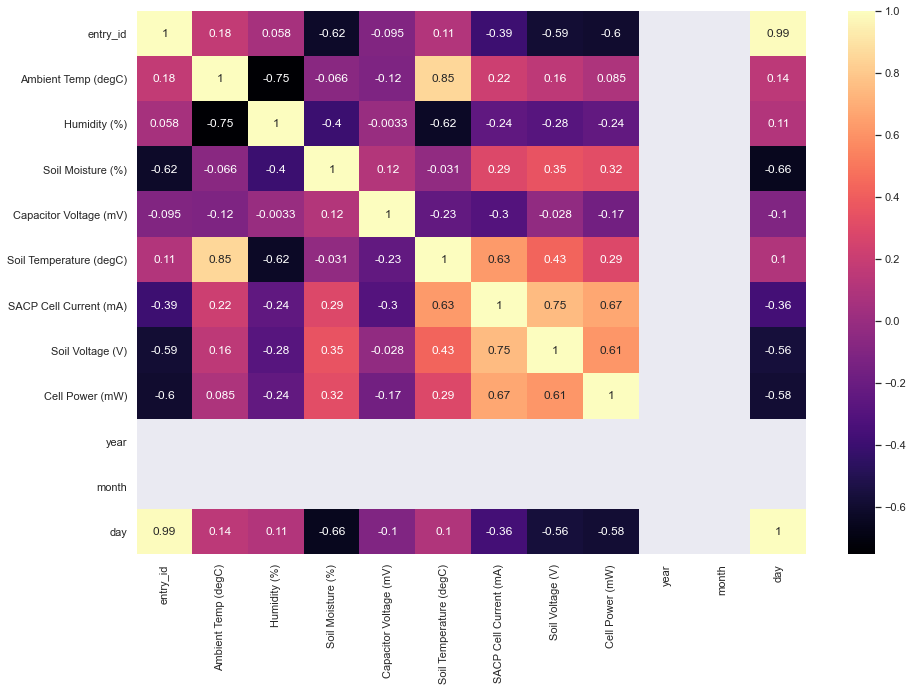

In [11]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_1 = dataset_june_2020.corr()
sns.heatmap(correlation_data_1, cmap='magma', annot= True, cbar= True)

<AxesSubplot:>

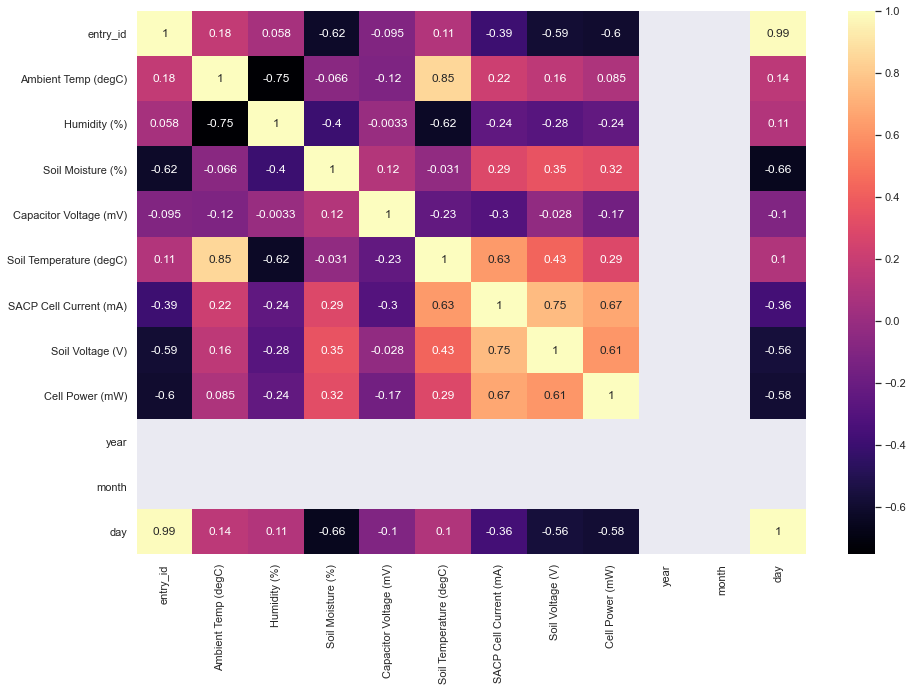

In [12]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_2 = dataset_june_2020.corr()
sns.heatmap(correlation_data_2, cmap='magma', annot= True, cbar= True)

<AxesSubplot:>

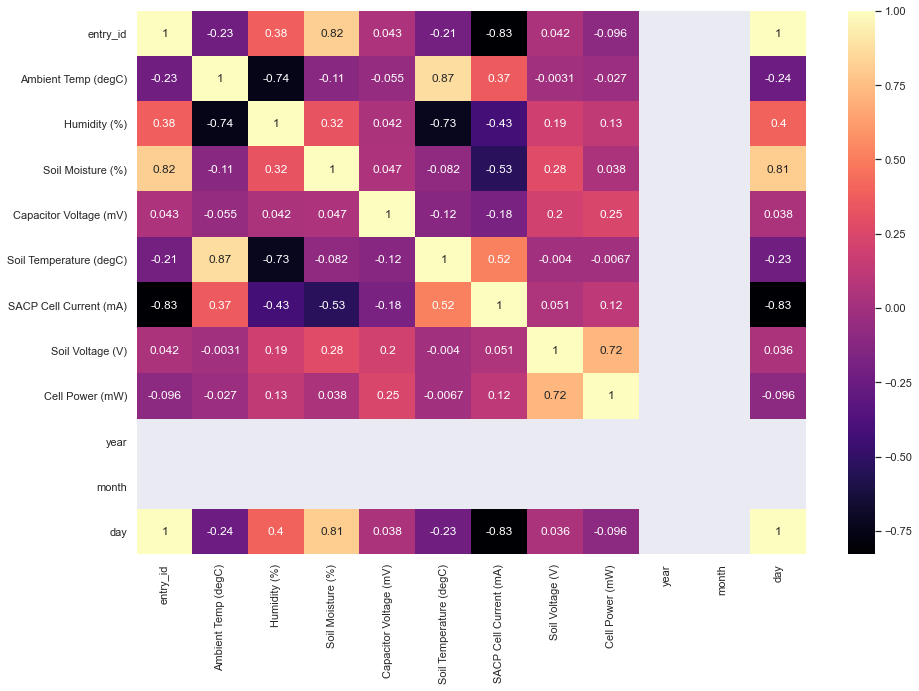

In [13]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_2 = dataset_july_2020.corr()
sns.heatmap(correlation_data_2, cmap='magma', annot= True, cbar= True)

<AxesSubplot:>

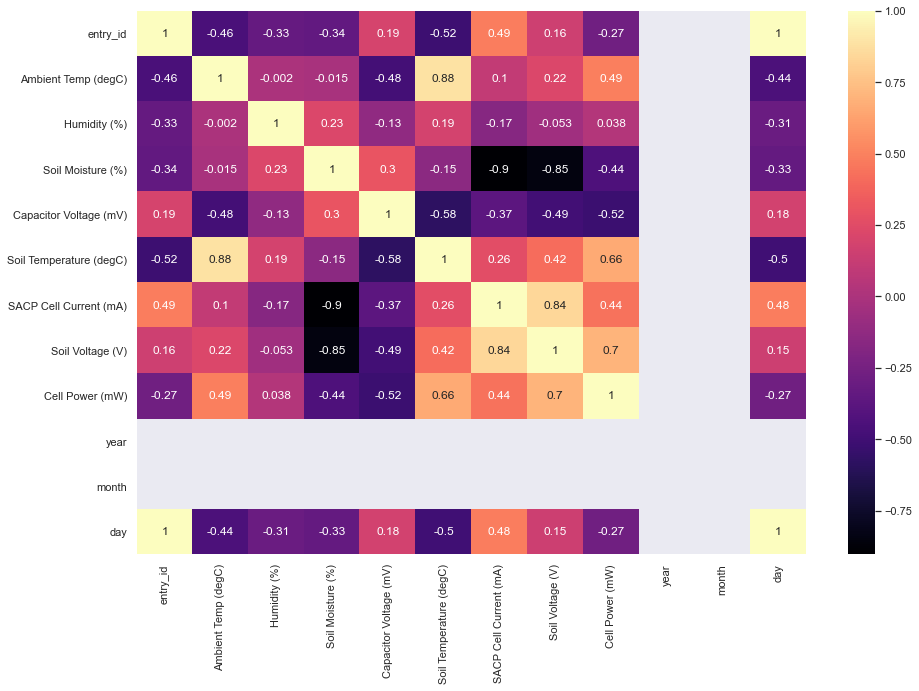

In [14]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_3 = dataset_nov_2020.corr()
sns.heatmap(correlation_data_3, cmap='magma', annot= True, cbar= True)

<AxesSubplot:>

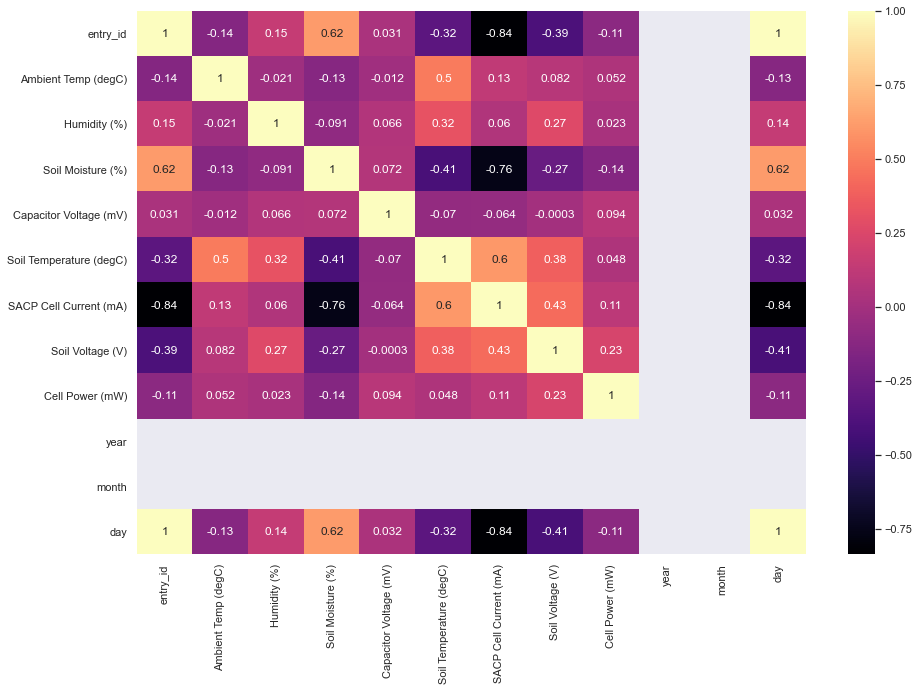

In [15]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_4 = dataset_dec_2020.corr()
sns.heatmap(correlation_data_4, cmap='magma', annot= True, cbar= True)

<AxesSubplot:>

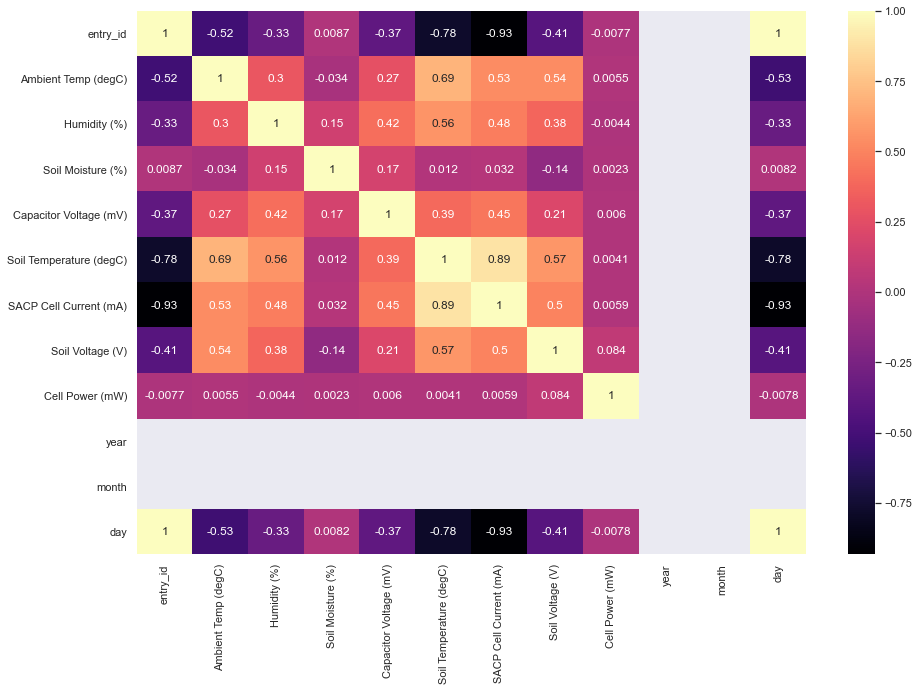

In [16]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_5 = dataset_jan_2021.corr()
sns.heatmap(correlation_data_5, cmap='magma', annot= True, cbar= True)

<AxesSubplot:>

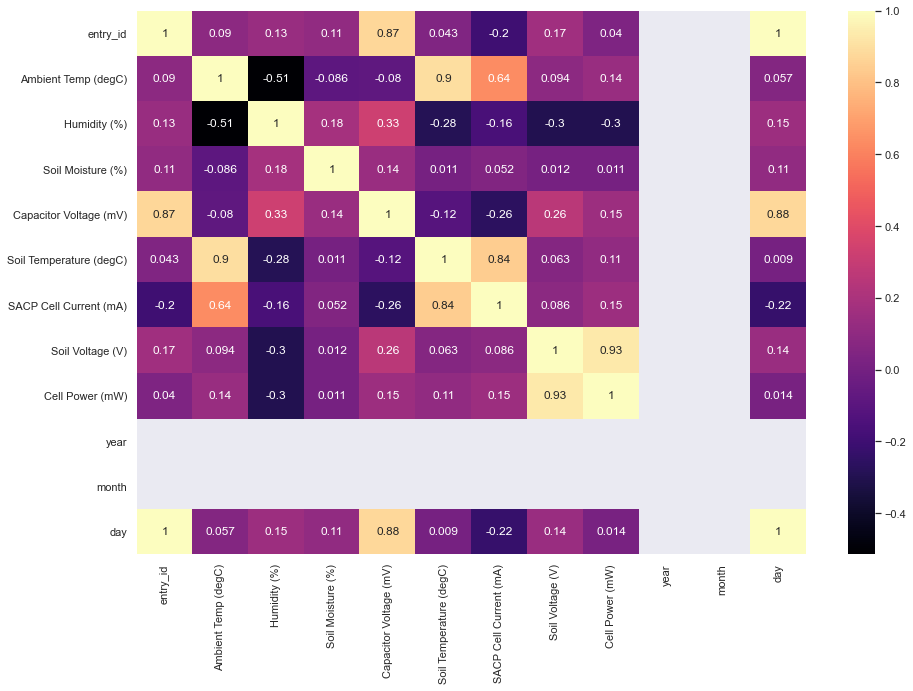

In [17]:
# checking the correlation of data

fig = plt.figure(figsize=(15,10))
correlation_data_5 = dataset_apr_2021.corr()
sns.heatmap(correlation_data_5, cmap='magma', annot= True, cbar= True)

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

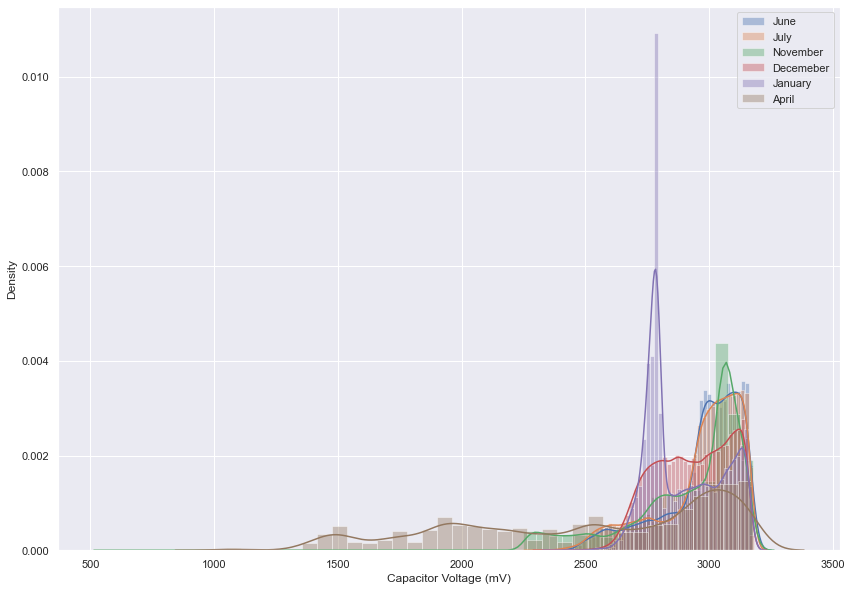

In [18]:
fig = plt.figure(figsize=(14,10))
sns.distplot(dataset_june_2020['Capacitor Voltage (mV)'], label = "June", hist = True, kde = True)
sns.distplot(dataset_july_2020['Capacitor Voltage (mV)'], label = "July", hist = True, kde = True)
sns.distplot(dataset_nov_2020['Capacitor Voltage (mV)'], label = "November", hist = True, kde = True)
sns.distplot(dataset_dec_2020['Capacitor Voltage (mV)'], label = "Decemeber", hist = True, kde = True)
sns.distplot(dataset_jan_2021['Capacitor Voltage (mV)'], label = "January", hist = True, kde = True)
sns.distplot(dataset_apr_2021['Capacitor Voltage (mV)'], label = "April", hist = True, kde = True)

plt.legend()

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

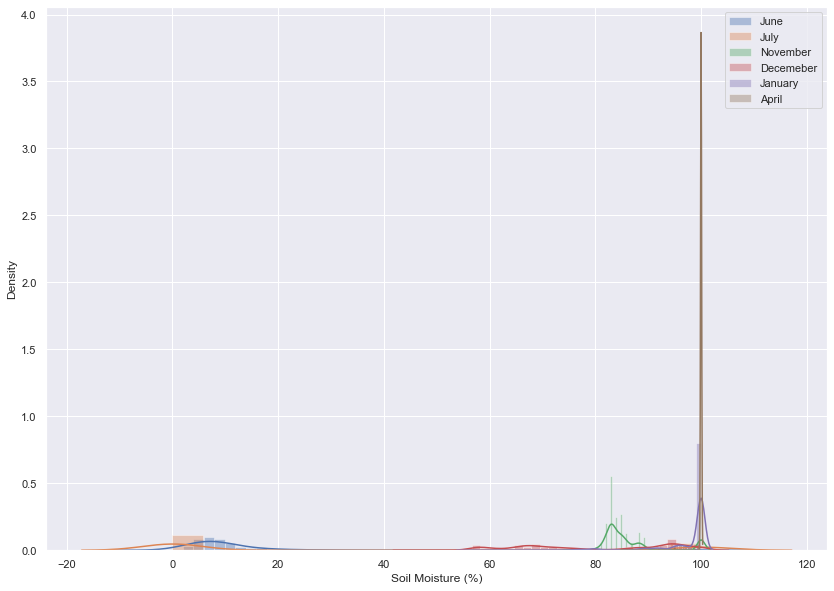

In [19]:
fig = plt.figure(figsize=(14,10))
sns.distplot(dataset_june_2020['Soil Moisture (%)'], label = "June", hist = True, kde = True)
sns.distplot(dataset_july_2020['Soil Moisture (%)'], label = "July", hist = True, kde = True)
sns.distplot(dataset_nov_2020['Soil Moisture (%)'], label = "November", hist = True, kde = True)
sns.distplot(dataset_dec_2020['Soil Moisture (%)'], label = "Decemeber", hist = True, kde = True)
sns.distplot(dataset_jan_2021['Soil Moisture (%)'], label = "January", hist = True, kde = True)
sns.distplot(dataset_apr_2021['Soil Moisture (%)'], label = "April", hist = True, kde = True)

plt.legend()

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

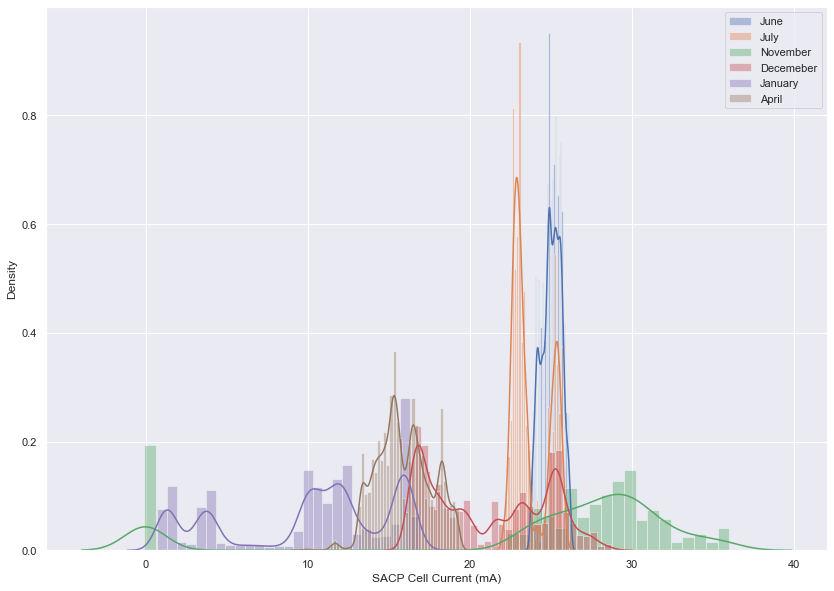

In [20]:
fig = plt.figure(figsize=(14,10))
sns.distplot(dataset_june_2020['SACP Cell Current (mA)'], label = "June", hist = True, kde = True)
sns.distplot(dataset_july_2020['SACP Cell Current (mA)'], label = "July", hist = True, kde = True)
sns.distplot(dataset_nov_2020['SACP Cell Current (mA)'], label = "November", hist = True, kde = True)
sns.distplot(dataset_dec_2020['SACP Cell Current (mA)'], label = "Decemeber", hist = True, kde = True)
sns.distplot(dataset_jan_2021['SACP Cell Current (mA)'], label = "January", hist = True, kde = True)
sns.distplot(dataset_apr_2021['SACP Cell Current (mA)'], label = "April", hist = True, kde = True)

plt.legend()

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

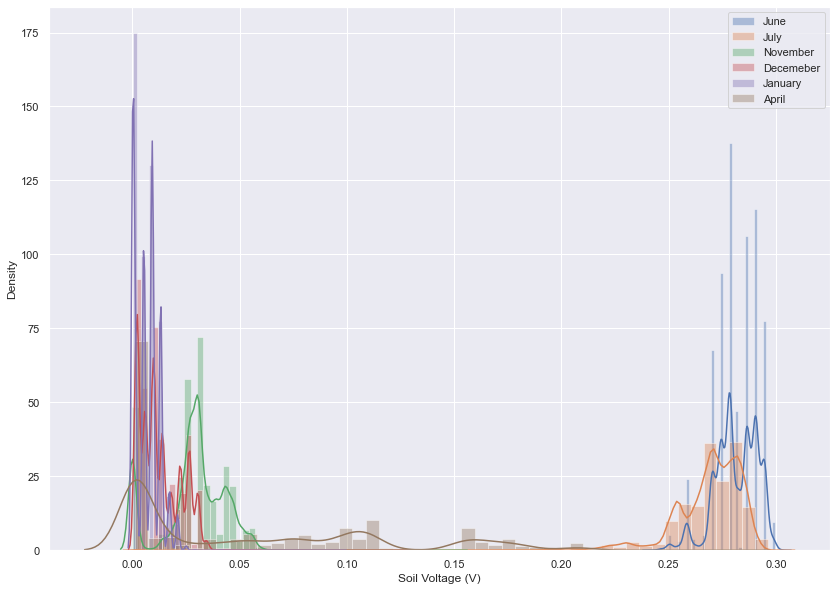

In [21]:
fig = plt.figure(figsize=(14,10))
sns.distplot(dataset_june_2020['Soil Voltage (V)'], label = "June", hist = True, kde = True)
sns.distplot(dataset_july_2020['Soil Voltage (V)'], label = "July", hist = True, kde = True)
sns.distplot(dataset_nov_2020['Soil Voltage (V)'], label = "November", hist = True, kde = True)
sns.distplot(dataset_dec_2020['Soil Voltage (V)'], label = "Decemeber", hist = True, kde = True)
sns.distplot(dataset_jan_2021['Soil Voltage (V)'], label = "January", hist = True, kde = True)
sns.distplot(dataset_apr_2021['Soil Voltage (V)'], label = "April", hist = True, kde = True)

plt.legend()

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'Distribution of SACP Cell Current (mA) April'}, xlabel='SACP Cell Current (mA)', ylabel='Density'>

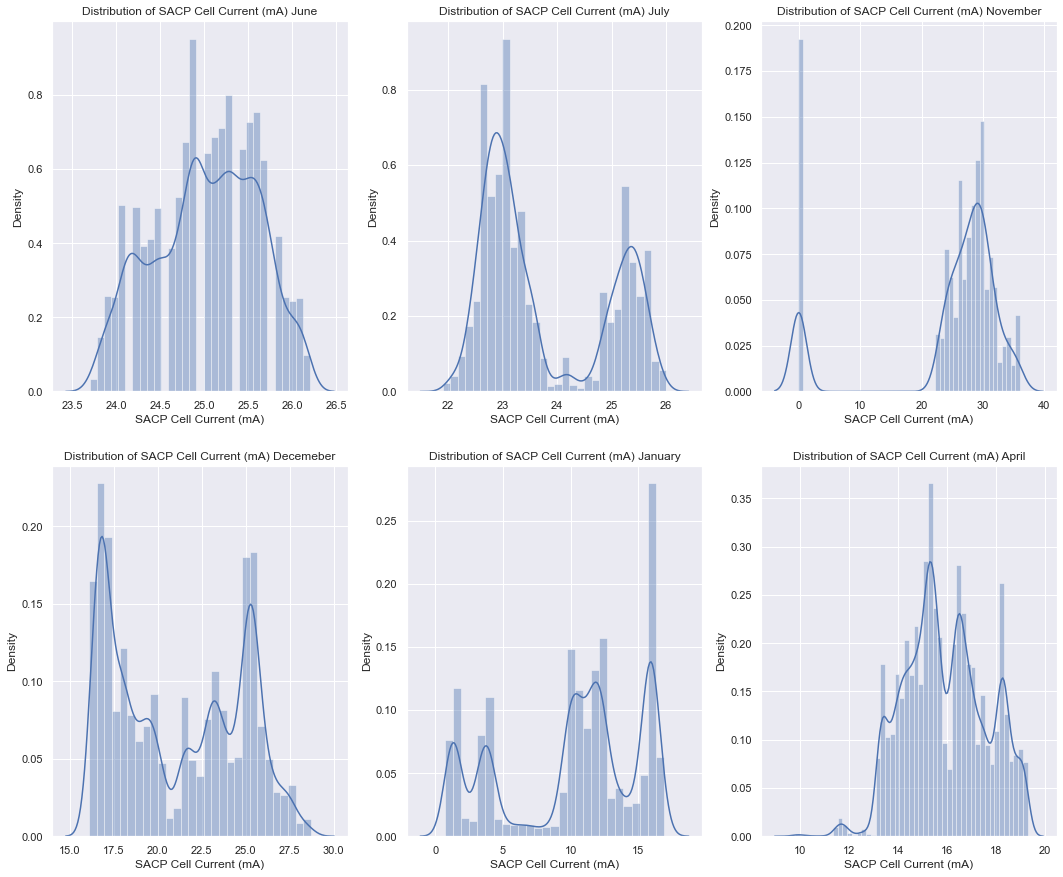

In [22]:
fig = plt.figure(figsize=(18,15))

plt.subplot(231)
plt.title("Distribution of SACP Cell Current (mA) June")
sns.distplot(dataset_june_2020['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(232)
plt.title("Distribution of SACP Cell Current (mA) July")
sns.distplot(dataset_july_2020['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(233)
plt.title("Distribution of SACP Cell Current (mA) November")
sns.distplot(dataset_nov_2020['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(234)
plt.title("Distribution of SACP Cell Current (mA) Decemeber")
sns.distplot(dataset_dec_2020['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(235)
plt.title("Distribution of SACP Cell Current (mA) January")
sns.distplot(dataset_jan_2021['SACP Cell Current (mA)'], hist = True, kde = True)

plt.subplot(236)
plt.title("Distribution of SACP Cell Current (mA) April")
sns.distplot(dataset_apr_2021['SACP Cell Current (mA)'], hist = True, kde = True)

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'Distribution of Soil Voltage (V) April'}, xlabel='Soil Voltage (V)', ylabel='Density'>

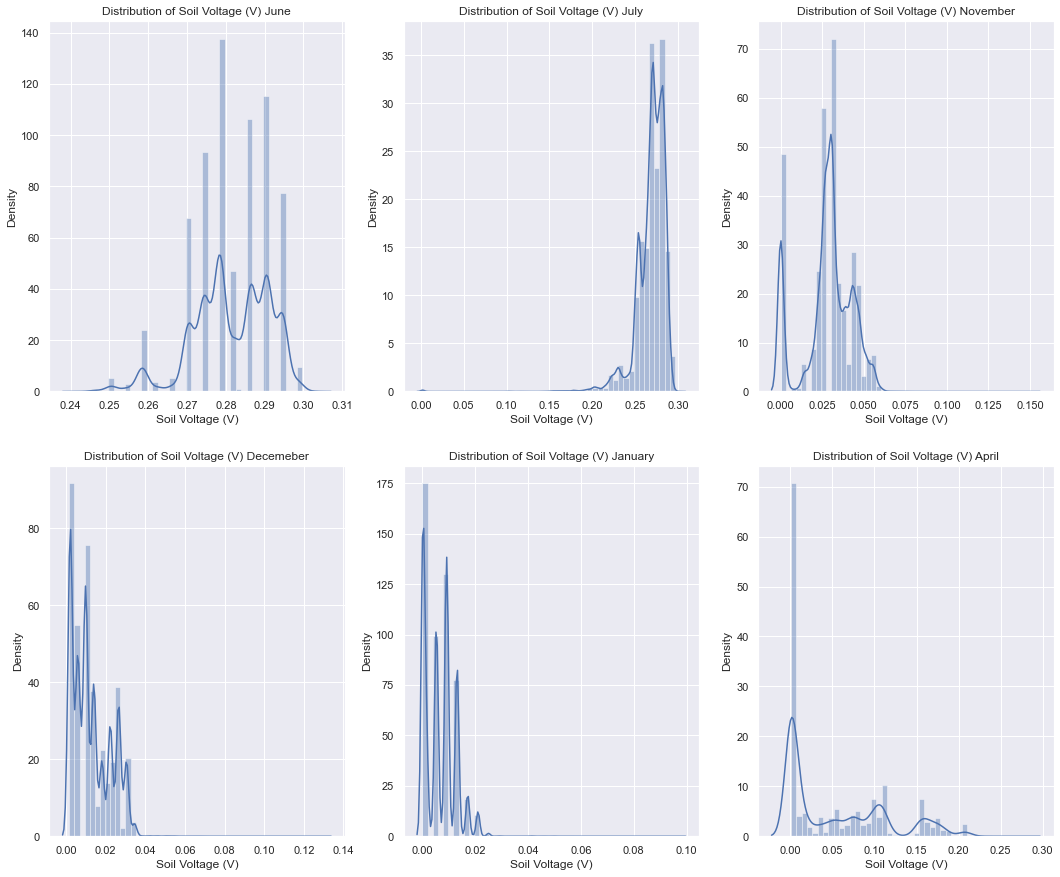

In [23]:
fig = plt.figure(figsize=(18,15))

plt.subplot(231)
plt.title("Distribution of Soil Voltage (V) June")
sns.distplot(dataset_june_2020['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(232)
plt.title("Distribution of Soil Voltage (V) July")
sns.distplot(dataset_july_2020['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(233)
plt.title("Distribution of Soil Voltage (V) November")
sns.distplot(dataset_nov_2020['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(234)
plt.title("Distribution of Soil Voltage (V) Decemeber")
sns.distplot(dataset_dec_2020['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(235)
plt.title("Distribution of Soil Voltage (V) January")
sns.distplot(dataset_jan_2021['Soil Voltage (V)'], hist = True, kde = True)

plt.subplot(236)
plt.title("Distribution of Soil Voltage (V) April")
sns.distplot(dataset_apr_2021['Soil Voltage (V)'], hist = True, kde = True)

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'Distribution of Capacitor Voltage (mV) April'}, xlabel='Capacitor Voltage (mV)', ylabel='Density'>

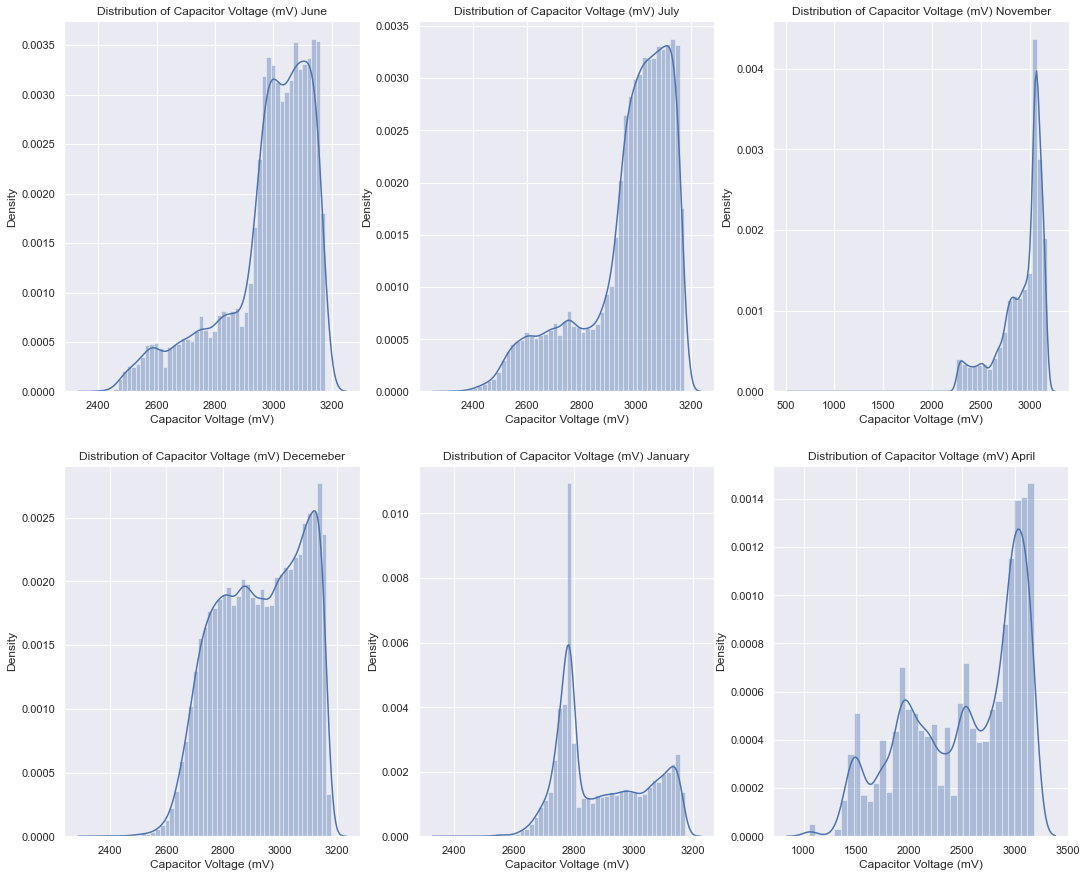

In [24]:
fig = plt.figure(figsize=(18,15))

plt.subplot(231)
plt.title("Distribution of Capacitor Voltage (mV) June")
sns.distplot(dataset_june_2020['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(232)
plt.title("Distribution of Capacitor Voltage (mV) July")
sns.distplot(dataset_july_2020['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(233)
plt.title("Distribution of Capacitor Voltage (mV) November")
sns.distplot(dataset_nov_2020['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(234)
plt.title("Distribution of Capacitor Voltage (mV) Decemeber")
sns.distplot(dataset_dec_2020['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(235)
plt.title("Distribution of Capacitor Voltage (mV) January")
sns.distplot(dataset_jan_2021['Capacitor Voltage (mV)'], hist = True, kde = True)

plt.subplot(236)
plt.title("Distribution of Capacitor Voltage (mV) April")
sns.distplot(dataset_apr_2021['Capacitor Voltage (mV)'], hist = True, kde = True)

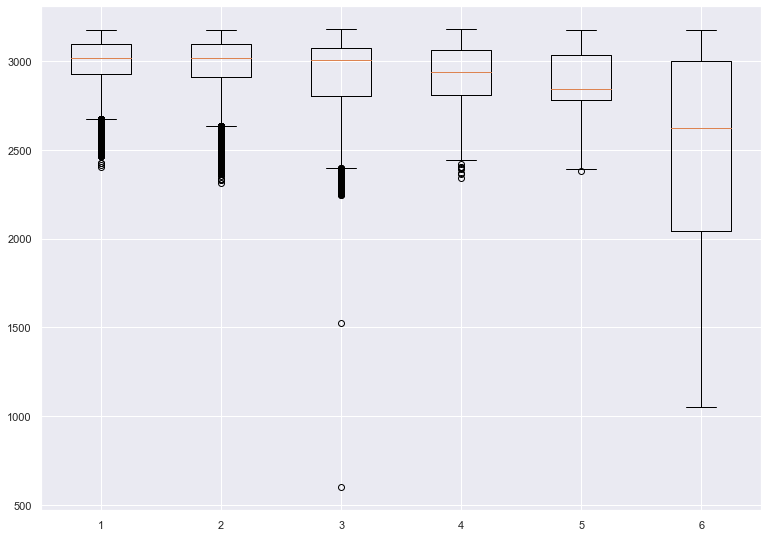

In [25]:
import matplotlib.pyplot as plt
import numpy as np

data = [dataset_june_2020['Capacitor Voltage (mV)'], dataset_july_2020['Capacitor Voltage (mV)'], dataset_nov_2020['Capacitor Voltage (mV)'], dataset_dec_2020['Capacitor Voltage (mV)'], dataset_jan_2021['Capacitor Voltage (mV)'], dataset_apr_2021['Capacitor Voltage (mV)']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

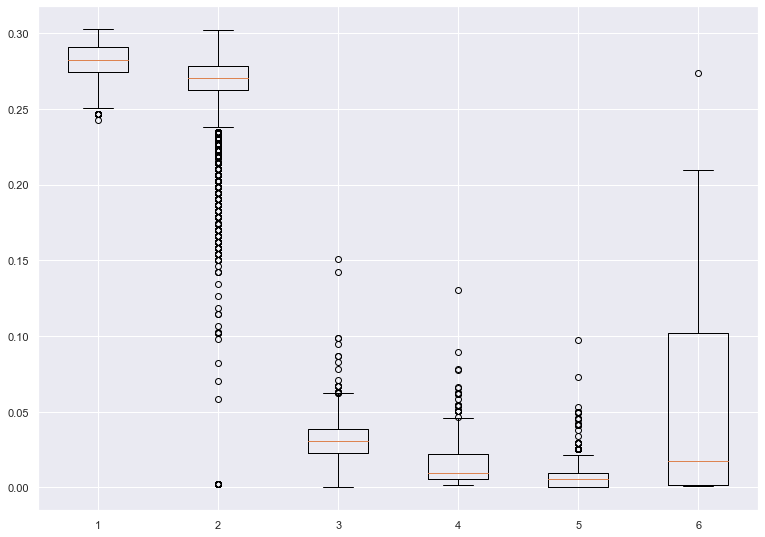

In [26]:
import matplotlib.pyplot as plt
import numpy as np

data = [dataset_june_2020['Soil Voltage (V)'], dataset_july_2020['Soil Voltage (V)'], dataset_nov_2020['Soil Voltage (V)'], dataset_dec_2020['Soil Voltage (V)'], dataset_jan_2021['Soil Voltage (V)'], dataset_apr_2021['Soil Voltage (V)']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

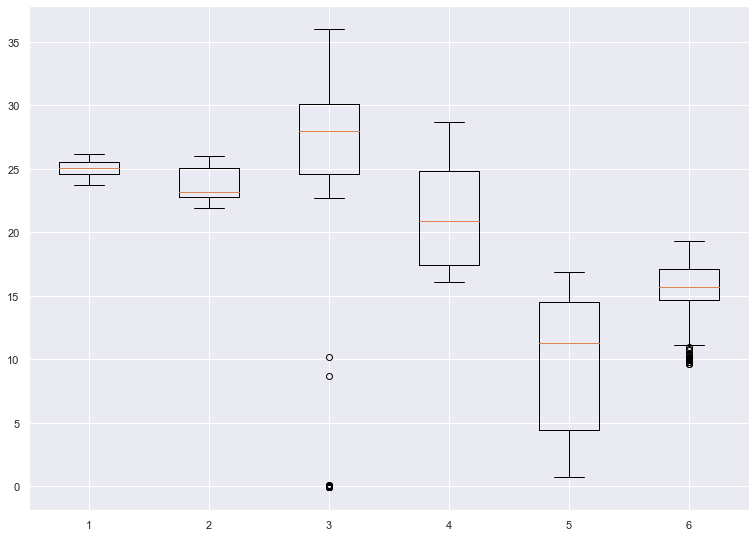

In [27]:
import matplotlib.pyplot as plt
import numpy as np

data = [dataset_june_2020['SACP Cell Current (mA)'], dataset_july_2020['SACP Cell Current (mA)'], dataset_nov_2020['SACP Cell Current (mA)'], dataset_dec_2020['SACP Cell Current (mA)'], dataset_jan_2021['SACP Cell Current (mA)'], dataset_apr_2021['SACP Cell Current (mA)']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()